## P10 - Détectez des faux billets ##

### Préparation ###

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics, decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [2]:
# on fixe le seed pour avoir le même résultat à chaque fois
np_seed = 15415
km_seed = 0
np.random.seed(np_seed)

* Ouverture du fichier

In [3]:
billets = pd.read_csv('billets.csv',delimiter =';')
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


* Vérification des valeurs manquantes ainsi que le type des variables

In [4]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


* Création d'un dataframe avec les valeurs manquantes

In [5]:
data_null = pd.isnull(billets['margin_low'])
null = billets[data_null]
null

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


* Création d'un datframe sans les valeurs manquantes

In [6]:
data_notnull = pd.notnull(billets['margin_low'])
notnull = billets[data_notnull]
notnull

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


### Exploration en remplaçant les valeurs manquantes ###

* Régression linéaire multiple

In [7]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=notnull).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.60e-202
Time:                        11:00:36   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

**Interprétation :** <br/>
    Les variables ont une p-value en-dessous de 0,05 donc, les variables sont significatives.

* Prédiction des valeurs à partir de la régression linéaire.

In [8]:
a_prevoir = pd.DataFrame({'diagonal': null['diagonal'],'height_left': null['height_left'], 'height_right': null['height_right'], 'margin_up': null['margin_up'], 'length': null['length']})
margin_low_prev = reg_multi.predict(a_prevoir)
margin_low_prev

72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

* Imputation des nouvelles valeurs dans le dataframe d'origine

In [9]:
null['margin_low'] = margin_low_prev
null

<ipython-input-9-2b48e26593d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null['margin_low'] = margin_low_prev


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
251,True,171.80,103.26,102.82,3.803308,2.95,113.22
284,True,171.92,103.83,103.76,4.179736,3.23,113.29
334,True,171.85,103.70,103.96,4.127442,3.00,113.36
410,True,172.56,103.72,103.51,4.135034,3.12,112.95
413,True,172.30,103.66,103.50,4.160539,3.16,112.95


* Vérification des valeurs manquantes

In [10]:
null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     bool   
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_low    37 non-null     float64
 5   margin_up     37 non-null     float64
 6   length        37 non-null     float64
dtypes: bool(1), float64(6)
memory usage: 2.1 KB


* Nouveau dataframe avec les valeurs imputées

In [11]:
new_data = null.merge(notnull, how='outer')
new_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.94,103.89,103.45,4.318525,3.25,112.79
1,True,171.93,104.07,104.18,4.393668,3.14,113.08
2,True,172.07,103.80,104.38,4.410457,3.02,112.93
3,True,171.45,103.66,103.80,4.319014,3.62,113.27
4,True,171.83,104.14,104.06,4.650617,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   object 
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), object(1)
memory usage: 93.8+ KB


* Création des échantillons de test et de training

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(new_data[['diagonal','height_left','height_right','margin_low','margin_up','length']], new_data['is_genuine'], train_size=0.8)
ytrain = ytrain.astype('bool')
ytest = ytest.astype('bool')

### Méthodes de prédiction ###

#### k-means (centroïdes) ####

In [14]:
# préparation des données
data_kmeans = xtrain
Xk = data_kmeans.values
xk_test = xtest.values

In [15]:
# elbow methode (clustering)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_kmeans)
    distortions.append(kmeanModel.inertia_)

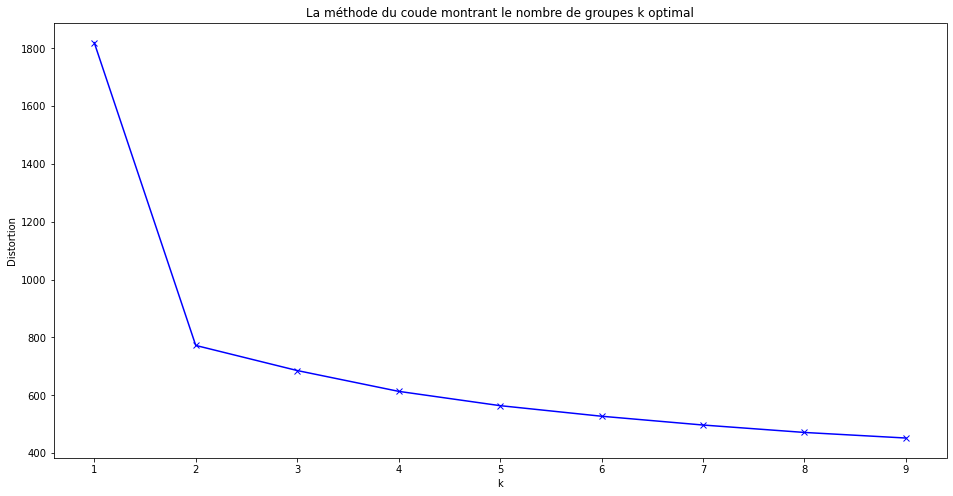

In [16]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('La méthode du coude montrant le nombre de groupes k optimal')
plt.show()

**Interprétation:**<br/>
    Le nombre de groupe intéressant est de 2.

In [17]:
# Nombre de clusters souhaités avec la méthode du coude
n_clust = 2

In [18]:
# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# on construit un standard scaler qu'on appliquera à chaque fois (training, test, exemple) aux données entrant dans les k-means
std_scaler = preprocessing.StandardScaler()
Xk_scaled = std_scaler.fit_transform(Xk)
xk_test_scaled = std_scaler.transform(xk_test)

In [19]:
# Clustering par K-means (on fixe l'état pour avoir le même résultat à chaque fois)
km = KMeans(n_clusters=n_clust, random_state=km_seed)
km.fit(Xk_scaled)

KMeans(n_clusters=2, random_state=0)

In [20]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

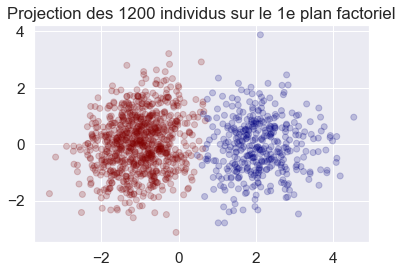

In [21]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(Xk_scaled)
Xk_projected = pca.transform(Xk_scaled)
sns.set(font_scale=1.4)
plt.scatter(Xk_projected[:, 0], Xk_projected[:, 1], c=clusters.astype(int), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(Xk_projected.shape[0]))
plt.show(block=False)

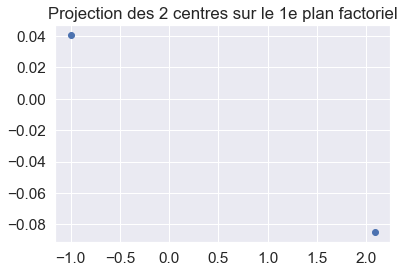

In [22]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
sns.set(font_scale=1.4)
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

* Prédiction de la variable <i>is_genuine</i>

In [23]:
# on prédit juste le cluster des données de test
y_predict_km = km.predict(xk_test_scaled)
y_predict_km = y_predict_km.astype('bool')

* Évaluation de l'optimisation du modèle à partir de la matrice de confusion

In [24]:
pd.crosstab(ytest,y_predict_km)

col_0,False,True
is_genuine,,
False,106,2
True,2,190


**Interprétation :**<br/>
    Dans la matrice de confusion:<br/>
        - 2 faux-positifs <br/>
        - 2 faux-négatifs

#### Régression logistique classique ####

In [25]:
# on définit x et y
y = ytrain.astype('bool')
# on ne prend que les colonnes quantitatives
x = xtrain.select_dtypes(np.number)

* Création du modèle de prédiction

In [26]:
model = LogisticRegression(penalty='none',solver='newton-cg')
model.fit(x,y)

LogisticRegression(penalty='none', solver='newton-cg')

* Prédiction de la variable <i>is_genuine</i>

In [27]:
y_predict_reg = model.predict(xtest)
y_predict_reg = y_predict_reg.astype('bool')

* Évaluation de l'optimisation du modele avec la matrice de confusion

In [28]:
pd.crosstab(ytest,y_predict_reg)

col_0,False,True
is_genuine,,
False,108,0
True,1,191


**Interprétation :**<br/>
    Dans la matrice de confusion :<br/>
        - 1 Faux-Négatif 

**Conclusion :**<br/>
    Après l'utilisation des deux méthodes de prédiction, la régression logistif est la plus précise.

## Test Algorithme ##

* Préparation du fichier

In [32]:
billets_production = pd.read_csv('billets_test.csv',delimiter =',')
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


* Kmeans

In [33]:
scaled_example = std_scaler.transform(billets_production[['diagonal','height_left','height_right','margin_low','margin_up','length']])
km.predict(scaled_example).astype('bool')

array([ True, False,  True, False, False])

* Prédiction d'après la régression logistique

In [34]:
model.predict(billets_production[['diagonal','height_left','height_right','margin_low','margin_up','length']]).astype('bool')

array([ True, False,  True, False, False])